# *ANN -Artificial Neural Network*

### *Analysis objective :<br>Applying -ANN- model on the prediction of -gender- as a target Feature*
---

In [228]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
matplotlib.rcParams["figure.figsize"]=(20,10)
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder_category=LabelEncoder()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import (r2_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix)
import warnings
from sklearn.utils.multiclass import unique_labels

In [229]:
df=pd.read_csv(r"C:/Users/Omar\Desktop/Omar_Files/Python_Analysis/DeepLearning_ANN/DataSet/data_car.csv")
df=df.drop(["X_OBSTAT_","clm","numclaims"],axis=1)
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0.0,UTE,2,F,E,2
3,4.14,0.317591,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0.0,HBACK,4,F,C,2


In [230]:
df=df.sort_values(by=['veh_age', 'agecat','area','gender']).reset_index().drop("index",axis=1)
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.59,0.229979,0.0,SEDAN,1,F,A,1
1,1.46,0.221766,0.0,HBACK,1,F,A,1
2,1.54,0.238193,0.0,SEDAN,1,F,A,1
3,1.57,0.522930,0.0,SEDAN,1,F,A,1
4,1.41,0.219028,0.0,HBACK,1,F,A,1


---

In [231]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

In [232]:
x=df.drop("gender",axis=1)
y=df["gender"]

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (50892, 7) and Y = (50892,) : 
Test data shape of X = (16964, 7) and Y = (16964,) : 


In [234]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

* *Importing Tensorflow :*

In [235]:
import tensorflow as tf

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

* *Model Preparation :*

In [237]:
classifier=Sequential()

* *1st Hidden Layer :*

In [238]:
classifier.add(Dense(units=7,activation="ReLU"))

* *2nd Hidden Layer :*

In [239]:
classifier.add(Dense(units=14,activation="ReLU"))

* *Last Layer -Output :*

In [240]:
classifier.add(Dense(1,activation="sigmoid"))

* *Adam Optimizer Preparation :*

In [241]:
import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

* *Compiling the Model :*

In [242]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

* *Early Stopping Preparation :*

In [243]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

* *Model Fitting :*

In [244]:
model_history=classifier.fit(x_train,y_train,validation_split=.33,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
1066/1066 [==============================] - 4s 3ms/step - loss: 0.6542 - accuracy: 0.6194 - val_loss: 0.6502 - val_accuracy: 0.6240
Epoch 2/1000
1066/1066 [==============================] - 4s 4ms/step - loss: 0.6468 - accuracy: 0.6306 - val_loss: 0.6492 - val_accuracy: 0.6268
Epoch 3/1000
1066/1066 [==============================] - 5s 4ms/step - loss: 0.6464 - accuracy: 0.6352 - val_loss: 0.6491 - val_accuracy: 0.6332
Epoch 4/1000
1066/1066 [==============================] - 5s 5ms/step - loss: 0.6456 - accuracy: 0.6330 - val_loss: 0.6479 - val_accuracy: 0.6310
Epoch 5/1000
1066/1066 [==============================] - 6s 5ms/step - loss: 0.6446 - accuracy: 0.6363 - val_loss: 0.6479 - val_accuracy: 0.6291
Epoch 6/1000
1066/1066 [==============================] - 7s 6ms/step - loss: 0.6455 - accuracy: 0.6342 - val_loss: 0.6470 - val_accuracy: 0.6336
Epoch 7/1000
1066/1066 [==============================] - 6s 5ms/step - loss: 0.6446 - accuracy: 0.6326 - val_loss: 0.6525 -

In [245]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

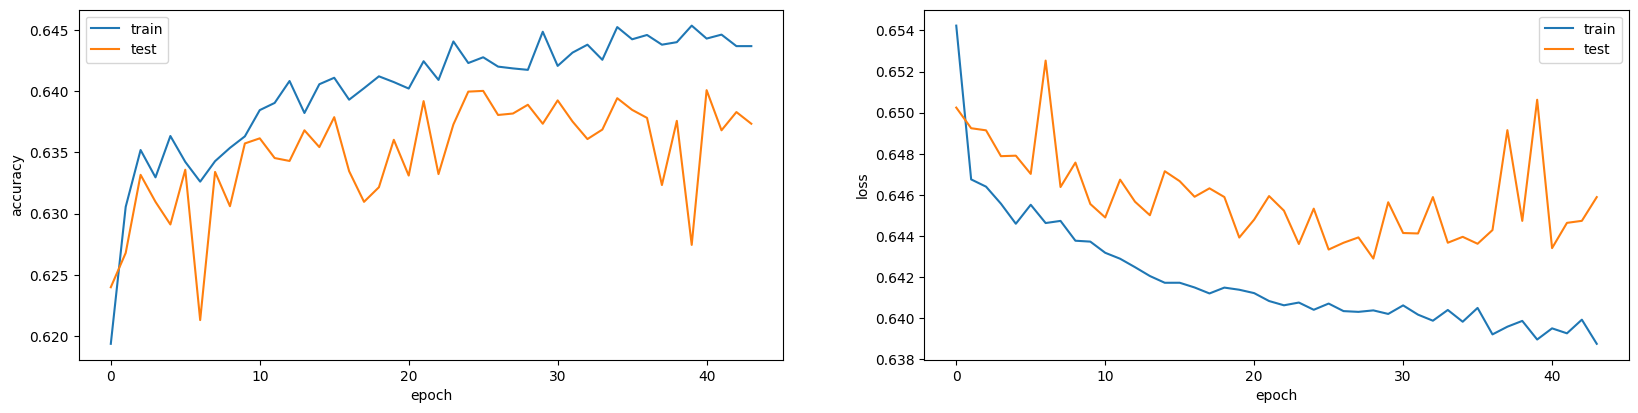

In [246]:
plt.subplot(221)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"]);


plt.subplot(222)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"]);

In [247]:
y=classifier.predict(x_test)

531/531 [==============================] - 2s 4ms/step


In [248]:
y=y>.5

In [249]:
confusion_matrix(y_test,y)

array([[8340, 1306],
       [4874, 2444]], dtype=int64)

In [250]:
accuracy_score(y_test,y)

0.6356991275642537

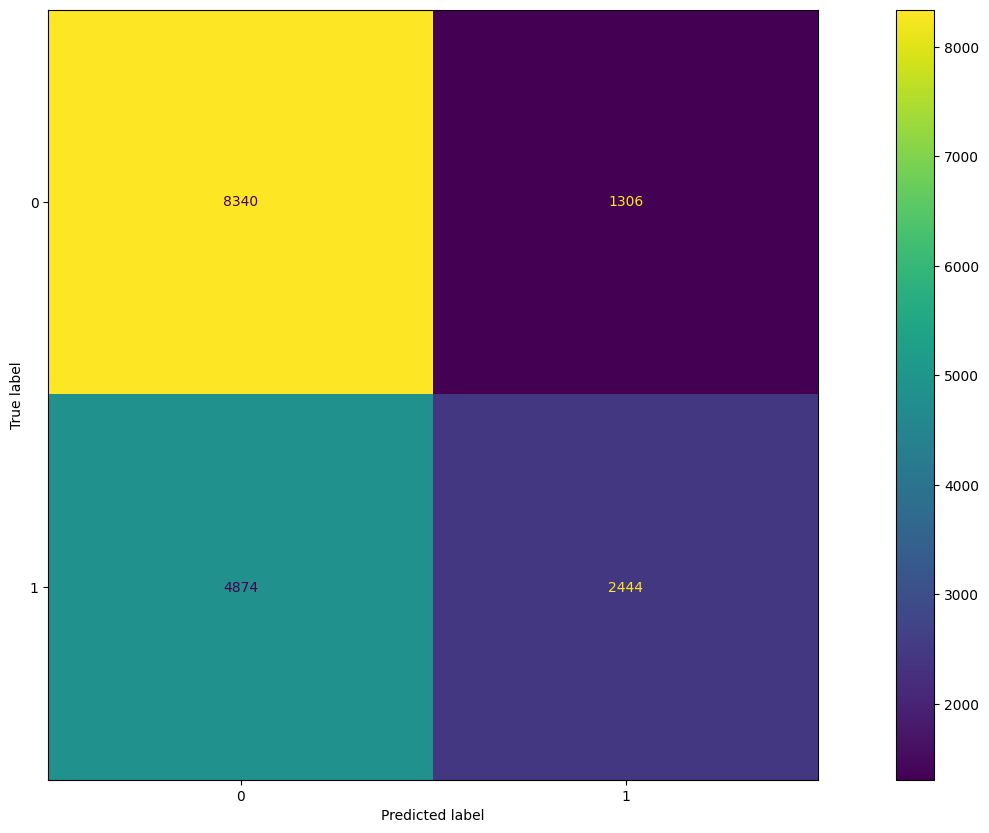

In [251]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y)).plot();

In [252]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      9646
           1       0.65      0.33      0.44      7318

    accuracy                           0.64     16964
   macro avg       0.64      0.60      0.59     16964
weighted avg       0.64      0.64      0.61     16964



In [254]:
import pickle
with open ("gender_prediction_model.pkl","wb") as f:
    pickle.dump(classifier,f)

---